In [23]:
import matplotlib.pyplot as plt
import random

In [24]:
X = [[1,1], [1,0], [2,0], [2,4], [3,5]]

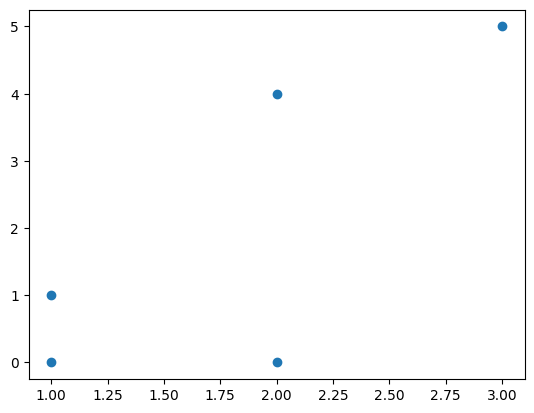

In [25]:
xpoints = []
ypoints = []

for i in range(len(X)):
  xpoints.append(X[i][0])
  ypoints.append(X[i][1])

plt.scatter(xpoints, ypoints)
plt.show()

In [26]:
def initialize_centroids(data, k):
  if k > len(data):
    print("K should be less than data points")
    return None
  else:
    centriods = random.sample(data, k)
    return centriods

In [35]:
centroids = initialize_centroids(X, 2)
centroids

[[1, 0], [3, 5]]

In [40]:
def get_distance(p1, p2):
  return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

def create_cluster(data, centroids):
  clusters = []
  for point in data:
        distances = [get_distance(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters.append(cluster_index)

  return clusters

In [41]:
temp = create_cluster(X, centroids)
temp

[0, 0, 0, 1, 1]

In [42]:
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = [data[j] for j in range(len(data)) if clusters[j] == i]
        print(cluster_points)
        if cluster_points:
            new_centroid = [sum(point[i] for point in cluster_points) / len(cluster_points) for i in range(len(data[0]))]
            new_centroids.append(new_centroid)
    return new_centroids

In [43]:
new = update_centroids(X, temp, 2)
new

[[1, 1], [1, 0], [2, 0]]
[[2, 4], [3, 5]]


[[1.3333333333333333, 0.3333333333333333], [2.5, 4.5]]

In [44]:
def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)

    for _ in range(max_iterations):
        clusters = create_cluster(data, centroids)
        new_centroids = update_centroids(data, clusters, k)

        if centroids == new_centroids:
            break

        centroids = new_centroids

    return centroids, clusters

[[1, 0], [2, 0]]
[[1, 1], [2, 4], [3, 5]]
[[1, 1], [1, 0], [2, 0]]
[[2, 4], [3, 5]]
[[1, 1], [1, 0], [2, 0]]
[[2, 4], [3, 5]]


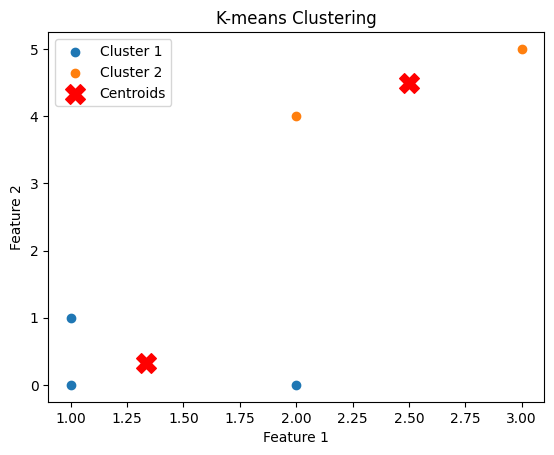

In [47]:
k = 2
centroids, clusters = kmeans(X, k)

for i in range(k):
    cluster_points = [X[j] for j in range(len(X)) if clusters[j] == i]
    plt.scatter([point[0] for point in cluster_points], [point[1] for point in cluster_points], label=f'Cluster {i + 1}')

plt.scatter([centroid[0] for centroid in centroids], [centroid[1] for centroid in centroids], marker='X', s=200, c='red', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()